<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_2_8)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.8_n20.csv',
 'data_multi_delta_-2.8_n30.csv',
 'data_multi_delta_-2.8_n60.csv',
 'data_multi_delta_-2.8_n120.csv',
 'data_multi_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,49.645349,33.084007,0.008778,92.738134,92.731300,0.006834
1,0.0,1.0,89.768933,47.900851,0.009013,147.678797,147.670276,0.008521
2,0.0,2.0,34.034669,47.098678,0.011813,91.145160,91.135114,0.010046
3,0.0,3.0,77.538054,88.493540,-0.000468,176.031126,176.030837,0.000289
4,0.0,4.0,82.909950,48.801881,-0.000278,141.711552,141.712442,-0.000890
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,93.146458,89.964016,0.001560,193.112034,193.112422,-0.000389
29996,999.0,26.0,81.007891,32.849459,0.000878,123.858228,123.859061,-0.000833
29997,999.0,27.0,86.454149,87.809580,0.000131,184.263861,184.265378,-0.001517
29998,999.0,28.0,45.101543,48.059200,0.002130,103.162873,103.160687,0.002186


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,49.645349,33.084007,0.008778,92.738134,92.731300,0.006834
1,0.0,1.0,89.768933,47.900851,0.009013,147.678797,147.670276,0.008521
2,0.0,2.0,34.034669,47.098678,0.011813,91.145160,91.135114,0.010046
3,0.0,3.0,77.538054,88.493540,-0.000468,176.031126,176.030837,0.000289
4,0.0,4.0,82.909950,48.801881,-0.000278,141.711552,141.712442,-0.000890
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,93.146458,89.964016,0.001560,193.112034,193.112422,-0.000389
29996,999.0,26.0,81.007891,32.849459,0.000878,123.858228,123.859061,-0.000833
29997,999.0,27.0,86.454149,87.809580,0.000131,184.263861,184.265378,-0.001517
29998,999.0,28.0,45.101543,48.059200,0.002130,103.162873,103.160687,0.002186


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    49.645349  33.084007  0.008778   92.738134   92.731300  0.006834
      1.0    89.768933  47.900851  0.009013  147.678797  147.670276  0.008521
      2.0    34.034669  47.098678  0.011813   91.145160   91.135114  0.010046
      3.0    77.538054  88.493540 -0.000468  176.031126  176.030837  0.000289
      4.0    82.909950  48.801881 -0.000278  141.711552  141.712442 -0.000890
...                ...        ...       ...         ...         ...       ...
999.0 25.0   93.146458  89.964016  0.001560  193.112034  193.112422 -0.000389
      26.0   81.007891  32.849459  0.000878  123.858228  123.859061 -0.000833
      27.0   86.454149  87.809580  0.000131  184.263861  184.265378 -0.001517
      28.0   45.101543  48.059200  0.002130  103.162873  103.160687  0.002186
      29.0   24.474324  61.429852  0.000440   95.904615   95.903079  0.001537

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    49.645349  33.084007  0.008778   92.738134   92.731300  0.006834
      1.0    89.768933  47.900851  0.009013  147.678797  147.670276  0.008521
      2.0    34.034669  47.098678  0.011813   91.145160   91.135114  0.010046
      3.0    77.538054  88.493540 -0.000468  176.031126  176.030837  0.000289
      4.0    82.909950  48.801881 -0.000278  141.711552  141.712442 -0.000890
...                ...        ...       ...         ...         ...       ...
999.0 25.0   93.146458  89.964016  0.001560  193.112034  193.112422 -0.000389
      26.0   81.007891  32.849459  0.000878  123.858228  123.859061 -0.000833
      27.0   86.454149  87.809580  0.000131  184.263861  184.265378 -0.001517
      28.0   45.101543  48.059200  0.002130  103.162873  103.160687  0.002186
      29.0   24.474324  61.429852  0.000440   95.904615   95.903079  0.001537

[30000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,49.645349,33.084007,0.008778,92.738134,92.731300,0.006834
1,0.0,1.0,89.768933,47.900851,0.009013,147.678797,147.670276,0.008521
2,0.0,2.0,34.034669,47.098678,0.011813,91.145160,91.135114,0.010046
3,0.0,3.0,77.538054,88.493540,-0.000468,176.031126,176.030837,0.000289
4,0.0,4.0,82.909950,48.801881,-0.000278,141.711552,141.712442,-0.000890
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,93.146458,89.964016,0.001560,193.112034,193.112422,-0.000389
29996,999.0,26.0,81.007891,32.849459,0.000878,123.858228,123.859061,-0.000833
29997,999.0,27.0,86.454149,87.809580,0.000131,184.263861,184.265378,-0.001517
29998,999.0,28.0,45.101543,48.059200,0.002130,103.162873,103.160687,0.002186


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    49.645349  33.084007  0.008778   92.738134   92.731300  0.006834
      1.0    89.768933  47.900851  0.009013  147.678797  147.670276  0.008521
      2.0    34.034669  47.098678  0.011813   91.145160   91.135114  0.010046
      3.0    77.538054  88.493540 -0.000468  176.031126  176.030837  0.000289
      4.0    82.909950  48.801881 -0.000278  141.711552  141.712442 -0.000890
...                ...        ...       ...         ...         ...       ...
999.0 25.0   93.146458  89.964016  0.001560  193.112034  193.112422 -0.000389
      26.0   81.007891  32.849459  0.000878  123.858228  123.859061 -0.000833
      27.0   86.454149  87.809580  0.000131  184.263861  184.265378 -0.001517
      28.0   45.101543  48.059200  0.002130  103.162873  103.160687  0.002186
      29.0   24.474324  61.429852  0.000440   95.904615   95.903079  0.001537

[30000 rows x 6 columns]

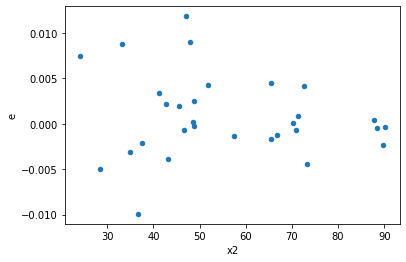

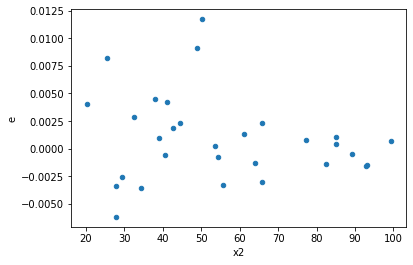

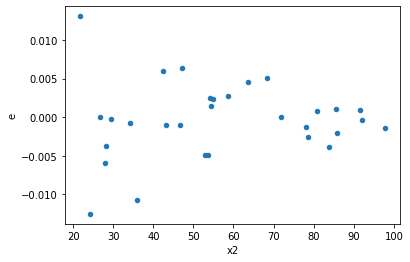

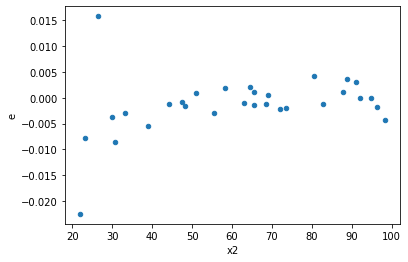

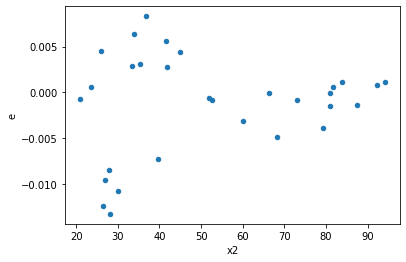

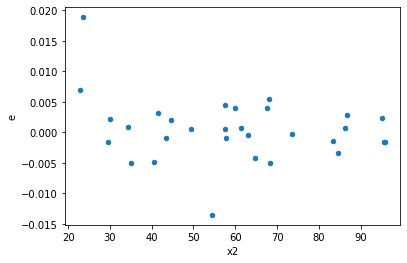

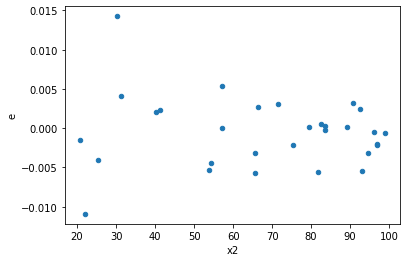

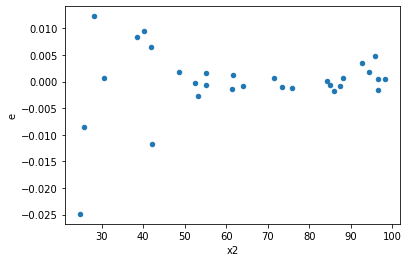

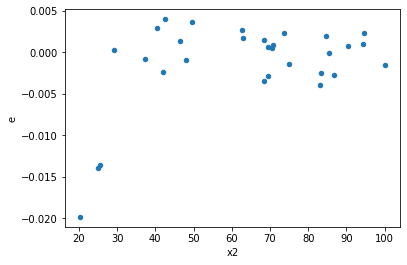

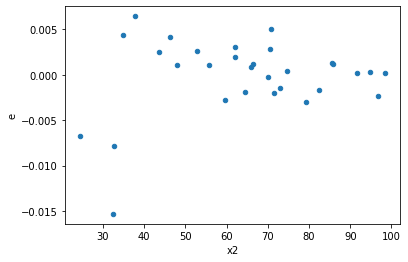

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,0.0004173503202963817,6.248971324532053e-05,4.173503202963817e-05,6.248971324532053e-06,0.14972964008016912,0.005977466097703983,Reject001=0 : Heteroscedasticity
1.0,10.0,10.0,0.00018830082859568647,2.2616261336193386e-05,1.8830082859568647e-05,2.2616261336193385e-06,0.12010707284116258,0.0024607326729393494,Reject001=0 : Heteroscedasticity
2.0,10.0,10.0,0.00045685626734133636,4.426820407634533e-05,4.568562673413363e-05,4.426820407634533e-06,0.09689744289590912,0.000999478300952851,Reject001=0 : Heteroscedasticity
3.0,10.0,10.0,0.000603617875441542,7.137343350384164e-05,6.0361787544154206e-05,7.1373433503841635e-06,0.11824274331112625,0.0023070326903232314,Reject001=0 : Heteroscedasticity
4.0,10.0,10.0,0.0005540237665274544,1.601587073920225e-05,5.540237665274544e-05,1.601587073920225e-06,0.028908273808518268,4.0134146803181704e-06,Reject001=0 : Heteroscedasticity
5.0,10.0,10.0,0.00031706917046985883,5.926683457113254e-05,3.1706917046985886e-05,5.926683457113253e-06,0.1869208364954124,0.013961016326582936,Reject001=1 : Homoscedasticity
6.0,10.0,10.0,0.0004532643917333421,4.768309743929284e-05,4.532643917333421e-05,4.768309743929284e-06,0.10519930157528251,0.001416617129091766,Reject001=0 : Heteroscedasticity
7.0,10.0,10.0,0.0010128652698402527,3.401210960482867e-05,0.00010128652698402527,3.401210960482867e-06,0.03358009265160508,8.174589598290522e-06,Reject001=0 : Heteroscedasticity
8.0,10.0,10.0,0.0002627149349337004,4.941772150055894e-05,2.627149349337004e-05,4.941772150055894e-06,0.18810396718797184,0.01429149484448488,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    821
Reject001=1 : Homoscedasticity      179
Name: Result_test, dtype: int64